In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Bài 1. Cho một số tự nhiên x và A là 1 mảng N số tự nhiên đôi một khác
nhau. Hãy thiết kế một thuật toán có độ phức tạp O(N log N) theo thời
gian để kiểm tra xem có tồn tại (i, j) sao cho A[i] + A[j] = x

1. Input:N, A, x.
2. Output: (i, j).

Trong đó cho x = 50.
- N tăng dần theo thứ tự 10, 20, 30, . . . , 1000.
- A được tạo ngẫu nhiên sao cho A[i] ∈ [1, 2, . . . , 10000], A[i] 6= A[j] ∀i, j ∈
{1, . . . , 1000}.
- Chứng minh rằng thuật toán đưa ra thỏa yêu cầu đề bài.
- Với mỗi N ∈ {10, 20, . . . , 1000}, chọn x = 50 tạo ngẫu nhiên A và tính
thời gian trung bình để kiểm tra ∃(i, j) : A[i] + A[j] = x. Gọi giá
trị đó là T(N). So sánh kết quả thực nghiệm và kết quả lý thuyết:
T(N) = O(N log N).


In [2]:
def merge_sort(a):
    compare = assign = 0
    current_size = 1
    assign += 1
    while current_size < len(a) - 1:
        compare += 1 
        left = 0
        
        while left < len(a)-1:
            
            mid = min((left + current_size - 1),(len(a)-1))
             
            right = ((2 * current_size + left - 1,
                    len(a) - 1)[2 * current_size
                        + left - 1 > len(a)-1])
                             
            a, compare_m, assign_m = merge(a, left, mid, right)
            left = left + current_size*2
            assign += (3 + assign_m)
            compare += (1 + compare_m)
            
        current_size = 2 * current_size
        assign += 2
        compare += 1
    compare += 1
    return a, compare, assign

# Merge Function
def merge(a, l, m, r):
    compare = assign = 0
    
    n1 = m - l + 1
    n2 = r - m
    L = [0] * n1
    R = [0] * n2
    for i in range(0, n1):
        compare += 1
        L[i] = a[l + i]
        assign += 1
    for i in range(0, n2):
        compare += 1
        R[i] = a[m + i + 1]
        assign += 1
    compare += 2
    
    i, j, k = 0, 0, l
    while i < n1 and j < n2:
        compare += 3
        if L[i] > R[j]:
            a[k] = R[j]
            j += 1
        else:
            a[k] = L[i]
            i += 1
        k += 1
        assign += 3
    compare += 2
 
    while i < n1:
        compare += 1
        a[k] = L[i]
        i += 1
        k += 1
        assign += 3
 
    while j < n2:
        compare += 1
        a[k] = R[j]
        j += 1
        k += 1
        assign += 3
    compare += 2
    assign += 7
    return a, compare, assign


def binary_search(arr, low, high, x):
    ''' This function implements binary search.
    ------------------------------
    Parameters:
        @arr : given array
        @x   : value to be needed to search
    ------------------------------
    Return:
        The index of x in arr if present, else return -1.
    '''
    compare = assign = 1
    
    mid = 0
    assign += 1
    
    while low <= high:
        compare += 1
        
        mid = (high + low) // 2
        assign += 1
        
        # If x is greater, ignore left half
        compare += 1
        if arr[mid] < x:
            low = mid + 1
            assign += 1
 
        # If x is smaller, ignore right half
        elif arr[mid] > x:
            compare += 1
            high = mid - 1
            assign += 1
 
        # means x is present at mid
        else:
            return mid, compare, assign
    
    compare += 1
    # If we reach here, then the element was not present
    return -1, compare, assign

In [3]:
def check_existence(A, N, x):
    ''' This function checks the existence of pair index (i,j) s.t A[i] + A[j] = x
    ----------------------------------
    Parameters:
        @A : given array
        @N : length of A
        @x : given value
    ----------------------------------
    Return:
        The pair index (i,j) satisfied condition if exists,
        else return -1'''
    compare = assign = 0
    A, compare_qs, assign_qs = merge_sort(A)
    compare += compare_qs
    assign += assign_qs
    for i in range(N):
        compare += 1
        found_index, compare_bs, assign_bs = binary_search(A, i+1, N-1, x - A[i])
        compare += compare_bs
        assign += assign_bs
        
        compare += 1
        if  found_index == -1:
            continue
        return (i, found_index), compare, assign
    compare += 1
    return -1, compare, assign

In [4]:
random.seed(5)
N = 10
A = random.sample(range(1, 100), N)
pair, _, _ = check_existence(A, N, x=50)
print(merge_sort(A)[0])
print(pair)

[4, 32, 33, 46, 60, 68, 80, 84, 89, 95]
(0, 3)


C:\Users\DELL\AppData\Local\Temp\ipykernel_632\3211011100.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  AA = np.array([random.sample(range(1, 10000), n) for n in N])
C:\Users\DELL\AppData\Local\Temp\ipykernel_632\3211011100.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array([check_existence(A, n, x=50) for (A, n) in zip(AA, N)])


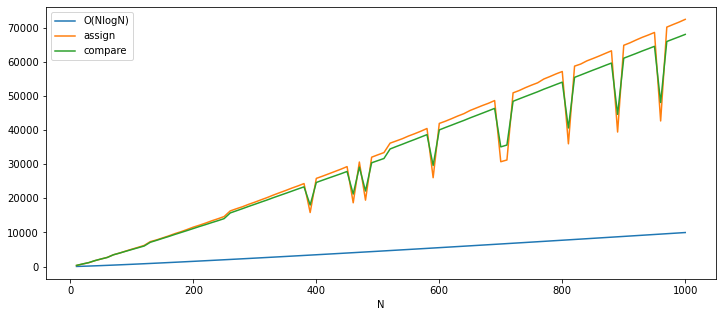

In [5]:
N = np.arange(10,1000+1,10)
random.seed(3)
AA = np.array([random.sample(range(1, 10000), n) for n in N])
temp = np.array([check_existence(A, n, x=50) for (A, n) in zip(AA, N)])

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(N, N*np.log2(N))
ax.plot(N, temp[:,1])
ax.plot(N, temp[:,2])
ax.set(xlabel="N")
ax.legend(["O(NlogN)", "assign", "compare"])
plt.savefig("ex1.jpg")
plt.show()